## Public Bike Parking in Dublin City

### *Import mandatory libraries*

In [1]:
# libraries for manipulating data
import pandas as pd
import numpy as np

# libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warning messages
import warnings
warnings.filterwarnings("ignore")

### 2. EDA

In [55]:
# Re-read firstly saved dataset
bp_final = pd.read_csv("dublin_bike_parking_stands_final.csv")

In [56]:
# Overview of the statistics of numeric data
bp_final.describe()

,easting,northing,long,lat,stand_numbers
count,9.360000e+02,936.000000,936.000000,936.000000,936.000000
mean,3.188461e+05,234259.146073,-6.222243,53.338613,5.929487
std,9.291506e+04,1604.292475,1.210941,0.229736,6.294157
min,3.084301e+05,229372.000000,-6.373332,46.331202,1.000000
25%,3.151364e+05,233365.512000,-6.271998,53.338002,4.000000
50%,3.157096e+05,234124.392500,-6.263309,53.344813,5.000000
75%,3.164988e+05,234831.379000,-6.251631,53.351273,7.000000
max,3.157997e+06,240413.000000,30.777691,53.400065,166.000000


In [57]:
# Overview of the statistics of categorical data
bp_final.describe(include = object)

,stand_type
count,936
unique,7
top,Sheffield Stand
freq,845


- *Overview of some of the infomation in the joined geodataframe, i.e. area_geometry.*

In [58]:
area_geometry["stand_type"].value_counts()

Sheffield Stand                 842
Hoops                            49
Stainless Steel Curved           22
Railing                          14
Temporary Racks                   4
Sheffield Stand +Cargo Stand      1
Cargo bike stands                 1
Name: stand_type, dtype: int64

In [59]:
area_geometry["area"].value_counts()

SOUTH EAST       437
CENTRAL          317
SOUTH CENTRAL    107
NORTH CENTRAL     60
NORTH WEST        12
Name: area, dtype: int64

In [60]:
area_geometry["stand_numbers"].min(), area_geometry["stand_numbers"].max()

(1, 166)

#### 2.2 Statistical analysis

In [74]:
print("Mean: " + str(bp_final["stand_numbers"].mean()))
print("Standard deviation: " + str(bp_final["stand_numbers"].std()))
print("Maximum: " + str(bp_final["stand_numbers"].max()))
print("Minimum: " + str(bp_final["stand_numbers"].min()))

Mean: 5.92948717948718
Standard deviation: 6.294157052280005
Maximum: 166
Minimum: 1


In [75]:
# skewness and kurtosis
print("Skewness: %f" % bp_final["stand_numbers"].skew())
print("Kurtosis: %f" % bp_final["stand_numbers"].kurt())

Skewness: 18.278106
Kurtosis: 450.263434


In [76]:
# Standardising data and show the low and high 10 ranges
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(bp_final["stand_numbers"][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print("Outer range (low) of the distribution: ")
print(low_range)
print("\n outer range (high) of the distribution: ")
print(high_range)

Outer range (low) of the distribution: 
[[-0.78360335]
 [-0.78360335]
 [-0.78360335]
 [-0.78360335]
 [-0.78360335]
 [-0.6246409 ]
 [-0.6246409 ]
 [-0.6246409 ]
 [-0.6246409 ]
 [-0.6246409 ]]

 outer range (high) of the distribution: 
[[ 1.91875827]
 [ 1.91875827]
 [ 2.23668317]
 [ 3.03149541]
 [ 3.03149541]
 [ 3.34942031]
 [ 4.46215745]
 [ 5.41593214]
 [ 5.73385704]
 [25.44520066]]


In [77]:
# Import libraries for distributions
from scipy.stats import norm
from scipy.stats import poisson
from scipy import stats
%matplotlib inline

- **Normal distribution**

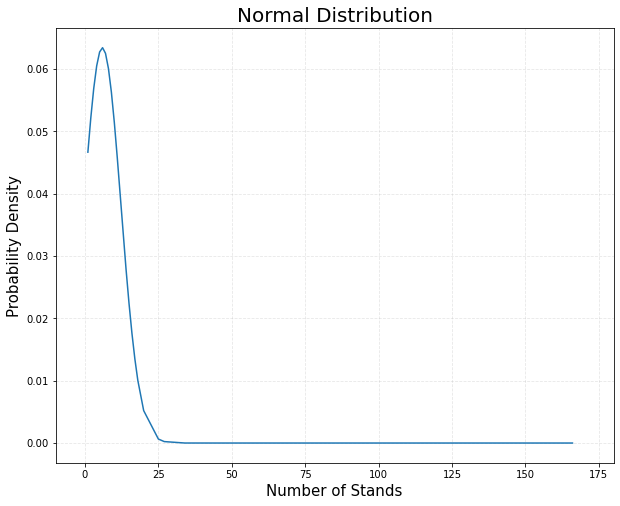

In [78]:
# Calculate mean and standard deviation
bp_mean = np.mean(bp_final["stand_numbers"])
bp_std = np.std(bp_final["stand_numbers"])
 
# Calculate probability density function (PDF)
pdf = stats.norm.pdf(bp_final["stand_numbers"].sort_values(), bp_mean, bp_std)
# Draw graph
plt.figure(figsize = (10, 8))
plt.plot(bp_final["stand_numbers"].sort_values(), pdf)
plt.xlim([-10, 180])  
plt.xlabel("Number of Stands", fontsize = 15)    
plt.ylabel("Probability Density", fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, alpha = 0.3, linestyle = "--")
plt.title("Normal Distribution", fontsize = 20)
plt.show()

- **Continous normal distribution**

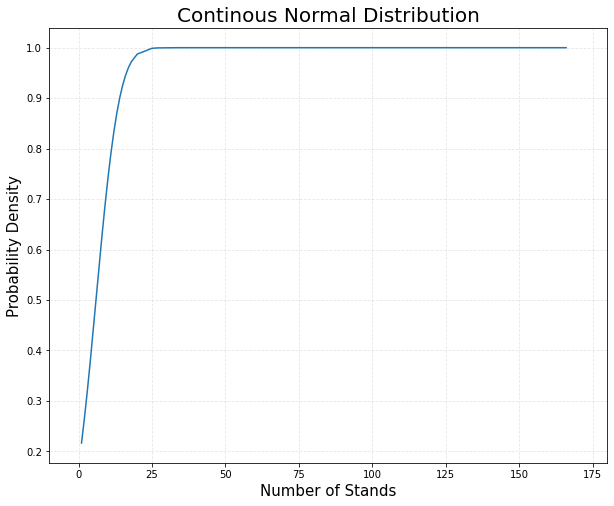

In [79]:
# Calculate mean and standard deviation
bp_mean = np.mean(bp_final["stand_numbers"])
bp_std = np.std(bp_final["stand_numbers"])
 
# Calculate cumulative distribution function (CDF)
cdf = stats.norm.cdf(bp_final["stand_numbers"].sort_values(), bp_mean, bp_std)

# Draw graph
plt.figure(figsize = (10, 8))
plt.plot(bp_final["stand_numbers"].sort_values(), cdf)
plt.xlim([-10, 180])  
plt.xlabel("Number of Stands", fontsize = 15)    
plt.ylabel("Probability Density", fontsize = 15)                
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, alpha = 0.3, linestyle = "--")
plt.title("Continous Normal Distribution", fontsize = 20)
plt.show()

- **Poisson distribution using random variates (RVS)**

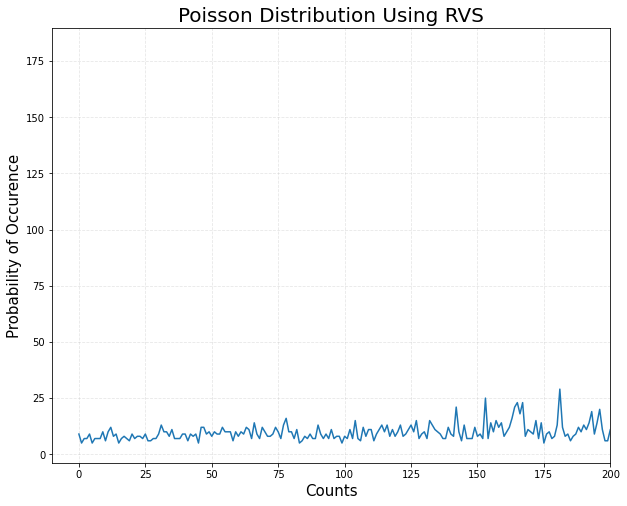

In [80]:
# Caculate k an mu
k = np.array(list(bp_final["stand_numbers"]))
mu = bp_final["stand_numbers"].mean()

# Calculate RVS and draw graph
plt.figure(figsize = (10, 8))
plt.plot(poisson.rvs(k, mu));
plt.xlim([-10, 200])  
plt.xlabel("Counts", fontsize = 15)    
plt.ylabel("Probability of Occurence", fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, alpha = 0.3, linestyle = "--")
plt.title("Poisson Distribution Using RVS", fontsize = 20)
plt.show()

- **Poisson distribution using probability mass function (PMF)**

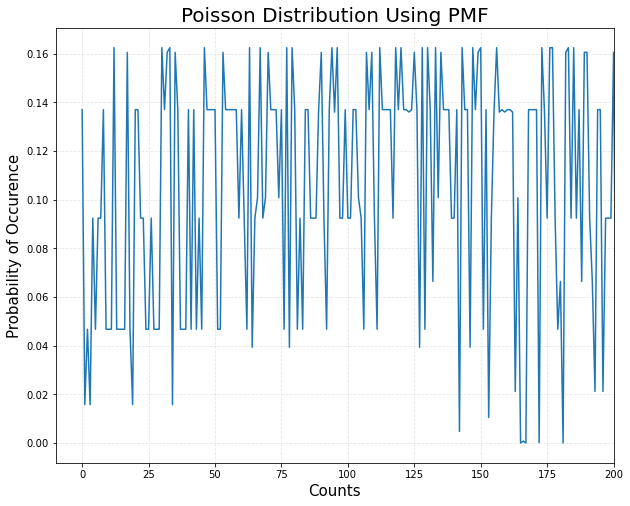

In [81]:
# Caculate k an mu
k = np.array(list(bp_final["stand_numbers"]))
mu = bp_final["stand_numbers"].mean()

# Calculate PMF and draw graph
plt.figure(figsize = (10, 8))
plt.plot(poisson.pmf(k, mu));
plt.xlim([-10, 200])  
plt.xlabel("Counts", fontsize = 15)    
plt.ylabel("Probability of Occurence", fontsize = 15)                
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, alpha = 0.3, linestyle = "--")
plt.title("Poisson Distribution Using PMF", fontsize = 20)
plt.show()

- **Poisson distribution using cumulative distribution function (CDF)** 

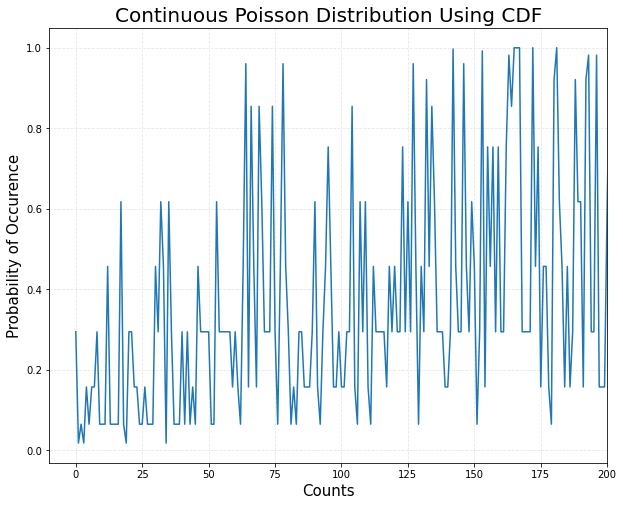

In [82]:
# Caculate k an mu
k = np.array(list(bp_final["stand_numbers"]))
mu = bp_final["stand_numbers"].mean()

# Calculate CDF and draw graph
plt.figure(figsize = (10, 8))
plt.plot(poisson.cdf(k, mu));
plt.xlim([-10, 200])  
plt.xlabel("Counts", fontsize = 15)    
plt.ylabel("Probability of Occurence", fontsize = 15)                
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, alpha = 0.3, linestyle = "--")
plt.title("Continuous Poisson Distribution Using CDF", fontsize = 20)
plt.show()

### References

- <p> https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=7 <p>
- <p> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html?highlight=poisson#scipy.stats.poisson <p>
- <p> https://fontawesome.com/icons/bicycle?s=solid&f=classic <p>
- <p> https://github.com/PacktPublishing/Machine-Learning-with-Real-World-Projects <p>
- <p> https://geopandas.org/en/stable/index.html <p>
- <p> https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/ <p>
- <p> https://matplotlib.org/stable/index.html <p>
- <p> https://pandas.pydata.org/docs/index.html <p>
- <p> https://pyproj4.github.io/pyproj/stable/index.html <p>
- <p> https://python-visualization.github.io/folium/quickstart.html#Getting-Started <p>
- <p> https://scikit-learn.org/stable/ <p>
- <p> https://stackoverflow.com/questions/71287607/how-to-make-a-normal-distribution-graph-from-data-frame-in-python <p>
- <p> https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6 <p>
- <p> https://www.datacamp.com/community/tutorials/introduction-machine-learning-python <p>
- <p> https://www.kaggle.com/code/dabaker/fancy-folium <p>
- <p> Peng, J. et al. (2021) ‘DataPrep.EDA: Task-Centric Exploratory Data Analysis for Statistical Modeling in Python’, in Proceedings of the 2021 International Conference on Management of Data. New York, NY, USA: Association for Computing Machinery (SIGMOD ’21), pp. 2271–2280. Available at: https://doi.org/10.1145/3448016.3457330. <p>